In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Вычисление элементарных функций

Вычисление значения функции на данном аргументе является одной из важнейших задач численных методов.
Несмотря на то, что вы уже огромное число раз вычисляли значения функций на практике, вам вряд ли приходилось самостоятельно реализовывать вычисление функций, не сводящихся к композиции элементарных.
Действительно, калькуляторы, стандартные библиотеки, математические пакеты и т.п. позволяют вам легко и зачастую с произвольной точностью вычислять значение широко известных функций.
Однако иногда вычисление элементраных функций приходится реализовывать самостоятельно, например, если вы пытаетесь добиться более высокой производительности, улучшить точность, эффективно распараллелить вычисления, используете среду/оборудование, для которого нет математических библиотек и т.п.
Алгоритмы вычисления элементарных функций сами по себе поучительны, так как учат нас избегать типичных ошибок расчетов на компьютере, подсказывают, как реализовать вычисления неэлементарных функций, а также позволяют рассмотреть нам некоторые методы, которые полностью проявляют свою мощь в более сложных задачах.

В этой лабораторной работе мы рассмотрим задачу вычисления натурального логарифма $y=\ln x$.
Функция выбрана достаточно произвольно, подобных оразом можно вычислить и другие элементарные функции.
Сразу стоит обратить внимание, что используемые методы достаточно универсальны, но не являются самыми быстрыми.

## Элементарные свойства. Редукция аргумента.

По-определению, натуральным логарифмом называется функция, обратная к экспоненте, т.е. $y=\ln x$ тогда и только тогда, когда $x=e^y$.
Поэтому если мы можем вычислять показательную функцию, то легко построить график логарифмической функции, нужно просто поменять переменные местами.

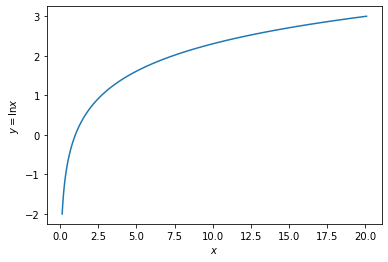

In [2]:
y=np.linspace(-2,3,100)
x=np.exp(y)
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

Для графического представления данных часто используется логарифмическая шкала, на которой находищиеся на одном расстоянии точки отличаются в одно и то же число раз.
График логарифма в логарифмической шкале по аргументу $x$ выглядит как прямая линия.

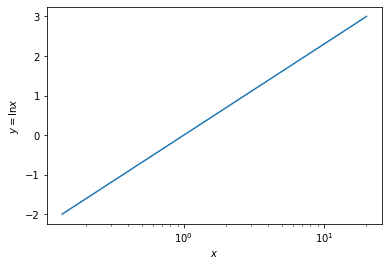

In [3]:
plt.semilogx(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

Лоагрифм преобразует умножение в сложение:
$$\ln (xy)=\ln x+\ln y.$$
а возведение в степень в умножение
$$\ln x^a=a\ln x.$$
Это свойство, например, может быть использовано для вычисления произвольных вещественных степеней:
$$a^x=\exp(\ln a^x)=\exp(a\ln x).$$
Это свойство можно применить и для того, чтобы выразить значения логарифма в одних точках, через значения в других, избежав вычислений значений в неудобных точках.
Например, воспользовавшись свойством
$$\ln \frac1x=-\ln x,$$
можно вычислять значения логарифма на всей области определения, реализовав вычисление логарифма только на интервале $(0,1]$ или от $[1,\infty)$.
Этот подход называется *редукцией* аргумента, и ипользуется при вычислении почти всех функций.

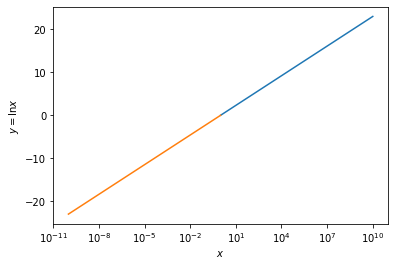

In [4]:
x=np.logspace(0,10,100)
y=np.log(x)
plt.semilogx(x,y)
plt.semilogx(1/x,-y)
plt.xlabel('$x$')
plt.ylabel('$y=\ln x$')
plt.show()

**Задание 1.** Выполните редукцию аргумента логарифма так, чтобы всегда получать значения из интервала $[1,1+\epsilon)$, где $\epsilon$ - маленькое положительное число. Каким свойством предпочтительнее воспользоваться $\ln x^2=2\ln x$ или $\ln \frac{x}{2}=\ln x-\ln 2$? 

Результат даже точного вычислении логарифма имеет погрешность равную произведению погрешности аргумента на число обусловленности.
Число обусловленности можно найти по формуле:
$$\kappa(x)=\frac{|x(\ln x)'|}{|ln x|}=\frac{|x/x|}{|\ln x|}=\frac{1}{|\ln x|}.$$
Так как погрешность аргумента всегда не привосходит, но может достигать половины машинной точности, то лучшая реализация вычисления логарфима будет иметь следующую точность:

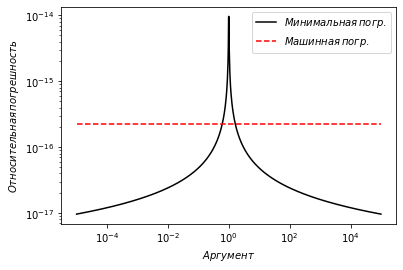

In [5]:
x0=np.logspace(-5,5,1000,dtype=np.double)
epsilon=np.finfo(np.double).eps
best_precision=(epsilon/2)*np.abs(1./np.log(x0))
plt.loglog(x0,best_precision, '-k')
plt.loglog(x0,np.full(x0.shape, epsilon), '--r')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\,погрешность$")
plt.legend(["$Минимальная\,погр.$","$Машинная\,погр.$"])
plt.show()

Формально при $x=1$ число обусловленности равно бесконечности (так как значение функции равно $0$), однако этот пик очень узкий, так что почти всюду значения могут быть найдены с машинной точностью, кроме узкого 

# Решение1

In [6]:
def reduction(x,eps): #выдает результат в виде (число, количество этапов редукции, инверсия 1/x)
    if x==1:
        return [x,0,0]
    if x<1:
        i=0
        x=1/x
        while x-1>eps:
            x=np.sqrt(x)
            i+=1
        return [x,i,1]
    if x>1:
        i=0
        while x-1>eps:
            x=np.sqrt(x)
            i+=1
        return [x,i,0]
    
def logg(x,eps):
    y=reduction(x,eps)
    if y[2]==1:
        lg=-np.log(y[0])*(np.power(2,y[1]))
    else:
        lg=np.log(y[0])*(np.power(2,y[1]))
    return(lg)
    
def rel_error(x,x0):
    d=np.abs(x0-x)/np.abs(x0)
    return d 

In [7]:
#посчитаем логарифм числа x: сделаем редукцию аргумента извлечением корней в отрезок [1,1+eps]
x=100
eps=0.01
print(logg(x,eps))
print('Погрешность:',rel_error(logg(x,eps),np.log(x)))

4.605170185988158
Погрешность: 1.4464911998299306e-14


|   $a$  |  $\sigma a$ |
|--------|-------------|
| $x$  |   $\varepsilon$ |
| $\sqrt x$ | $\cfrac \varepsilon 2 + \varepsilon$ |
| $\log(\sqrt x)$ | $\cfrac{\frac 3 2 \varepsilon}{\log(\sqrt x)}$ |
| $\sqrt[n] x$ | $\cfrac \varepsilon n + \varepsilon$ |
| $\log(\sqrt[n] x)$ | $\cfrac{\frac{(n+1)}{n} \varepsilon}{\log(\sqrt[n] x)}$ |

При извлечении корня учтем в относительной погрешности округление для корня и неточность числа n

<function matplotlib.pyplot.show(*args, **kw)>

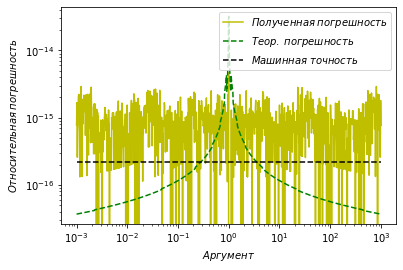

In [8]:
x0=np.logspace(-3,3,1000,dtype=np.double)

eps=0.1

def f(x,eps):
    return logg(x,eps)

def th_error(x,eps): #теор. погрешность зависит от числа итераций
    a=[]
    for i in range(len(x0)):
        if reduction(x[i],eps)[1]!=0:
            a.append(epsilon/np.abs(np.log(x[i]))*(1+1/reduction(x[i],eps)[1]))
        else:
            a.append(epsilon/np.abs(np.log(x[i])))
    return a

lo=[f(x,eps) for x in x0]

plt.loglog(x0,rel_error(lo,np.log(x0)), '-y')
plt.loglog(x0,th_error(x0,eps),'--g')
plt.loglog(x0,np.full(x0.shape, epsilon), '--k')
plt.xlabel('$Аргумент$')
plt.ylabel('$Относительная\;погрешность$')
plt.legend(["$Полученная\;погрешность$","$Теор.\;погрешность$","$Машинная\;точность$"])
plt.show

In [9]:
def reduction2(x): #выдает результат в виде (число, количество этапов редукции, инверсия 1/x)
    if x==1:
        return [x,0,0]
    if x<1:
        i=0
        x=1/x
        while x>2:
            x=x/2
            i+=1
        return [x,i,1]
    if x>1:
        i=0
        while x>2:
            x=x/2
            i+=1
        return [x,i,0]
    
def logg2(x):
    y=reduction2(x)
    if y[2]==1:
        lg=-(np.log(y[0])+y[1]*np.log(2))
    else:
        lg=np.log(y[0])+y[1]*np.log(2)
    return(lg)    

In [10]:
#посчитаем логарифм числа x: сделаем редукцию аргумента извлечением корней в отрезок [1,1+eps]
x=3
eps=0.001
print(reduction2(x))
print(logg2(x))
print('Погрешность:',rel_error(logg2(x),np.log(x)))

[1.5, 1, 0]
1.0986122886681096
Погрешность: 2.0211370946362213e-16


|   $a$  |  $\sigma a$ |
|--------|-------------|
| $x$  |   $\varepsilon$ |
| $\cfrac x 2$ | $\varepsilon$ |
| $\cfrac{x}{2^n}$ | $\varepsilon$ |
| $\log(x/2)$ | $\cfrac{\varepsilon}{\log(x/2)}$ |
| $\log(x/2^n)$ | $\cfrac{\varepsilon}{\log(x/2^n)}$ |

При делении на 2 погрешность не будет увеличиваться, так как 2 представлена в компьютере точно. В противном случае, при делении на число отличное от 2, мы бы получалали погрешность $2\varepsilon$ для деления на число $k \neq 1$ и $n\varepsilon$ - при делении на $k^n$.

Сравним относительные погрешности двух методов: $\cfrac{\varepsilon}{\log(x/2^n)}$ и $\cfrac{\varepsilon (1+\frac 1 n)}{\log(\sqrt[n] x)}$. Если $x < 2^{n+1}$, то использование редукции делением лучше, и наоборот. Стоит отметить, что это сравнение можно производить только для зафиксированного числа итераций $n$ в редукции аргумента методом деления пополам. 

Деление пополам не всегда приведет изначальное число $x$ в интервал $[1,1+eps)$, однако будет более точным процессом. С помощью метода извлечения корней можно добиться числа очень близкого к 1, однако погрешность будет велика.

<function matplotlib.pyplot.show(*args, **kw)>

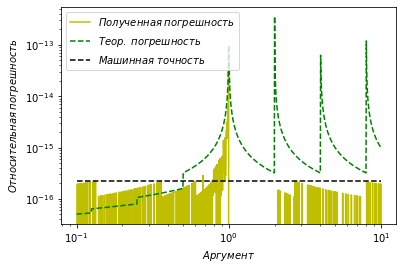

In [11]:
x0=np.logspace(-1,1,1000,dtype=np.double)
eps=0.1

def g(x):
    return logg2(x)

def th_error2(x): #теор. погрешность зависит от числа итераций
    b=[]
    for i in range(len(x0)):
            b.append(epsilon/np.abs(np.log(x[i])-reduction2(x[i])[1]*np.log(2)))
    return b

lo=[g(x) for x in x0]

plt.loglog(x0,rel_error(lo,np.log(x0)), '-y')
plt.loglog(x0,th_error2(x0),'--g')
plt.loglog(x0,np.full(x0.shape, epsilon), '--k')
plt.xlabel('$Аргумент$')
plt.ylabel('$Относительная\;погрешность$')
plt.legend(["$Полученная\;погрешность$","$Теор.\;погрешность$","$Машинная\;точность$"])
plt.show

## Разложение в степенной ряд

Из математического анализа нам известно, что для $|x|<1$ справедливо разложение логарифма в ряд:
$$\ln (1+a)=\sum_{k=1}^\infty (-1)^{n+1}a^k/k=x-x^2/2+x^3/3+\ldots.$$
Так как правая часть содержит только арифметические операции, то возникает соблазн использовать частичную сумму этого ряда для приближенного вычисления логарифма.
Первое препятствие на этом пути - это сходимость ряда только на малом интервале, т.е. таким способом могут быть получены только значения $\ln x$ для $x\in(0,2)$.
Вторая сложность заключается в том, что частичная сумма $S_N$ из $N$ членов ряда
$$S_N=\sum_{k=1}^N (-1)^{n+1}{a^k}/k$$
дает только часть суммы, а остаток ряда
$$R_N=\sum_{k=N+1}^\infty (-1)^{n+1}{a^k}/k$$
быстро увеличивается, если значения $a$ увеличиваются по модулю.
Вычислим численно относительную погрешность отбрасывания остатка ряда.

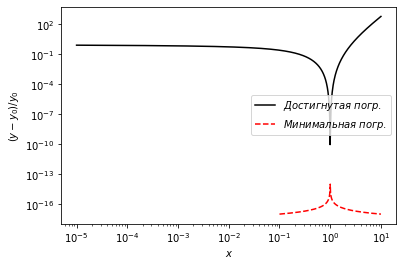

In [12]:
def relative_error(x0,x): return np.abs(x0-x)/np.abs(x0)

def log_teylor_series(x, N=5):
    a=x-1
    a_k=a # x в степени k. Сначала k=1
    y=a # Значене логарифма, пока для k=1.
    for k in range(2,N): # сумма по степеням
        a_k=-a_k*a # последовательно увеличиваем степень и учитываем множитель со знаком
        y=y+a_k/k
    return y

x=np.logspace(-5,1,1001)
y0=np.log(x)
y=log_teylor_series(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.loglog(x0,best_precision,'--r')
plt.xlabel('$x$')
plt.ylabel('$(y-y_0)/y_0$')
plt.legend(["$Достигнутая\;погр.$", "$Минимальная\;погр.$"],loc=5)
plt.show()
    

Формула Эйлера дает аккуратное приближение функции только рядом с точкой разложения (в даном случае $x=1$), что мы и наблюдаем в эксперименте. 
Наибольшую точность мы получили возле $x=1$, что противоречит нашей оценке через числа обусловленности. 
Однако нужно принимать во внимание, что мы сравнивали нашу реализацию со встроенной, которая не дает (и не может дать) абсолютно правильный ответ.

Точность вычислений можно увеличить, добавляя слагаемые в частичную сумму.
Сколько слагаемых нужно взять, чтобы достигнуть желаемой точности?
Распространено заблуждение, что суммировать нужно до тех пор, пока последнее добавленное слагаемое не станет меньше желаемой точности.
Вообще говоря это не так. 
Чтобы получить верную оценку погрешности отбрасывания остатка ряда, нужно оценить весь остаток ряда, а не только последнее слагаемое.
Для оценки остатка ряда можно воспользоваться формулой Лагранжа для остаточного члена:
$$R_N=\frac{a^{N+1}}{(N+1)!}\frac{d^{N+1}f(a\theta)}{da^{N+1}},$$
где как и выше $a=x-1$, а $\theta$ лежит на интервале $[0,1]$.

**Задание 2.** Найдите количество слагаемых в частичной сумме, достаточное для получения значения логарифма с заданной точностью. Реализуйте вычисления логарифма через сумму с заданной точностью. Какую максимальную точность удается достичь?

# Решение2

Можно сделать редукцию аргумента в интервал $[1,1+eps)$.

Оценим остаток ряда:

$|R_N|=\left|\cfrac{a^{N+1}}{(N+1)!}\cfrac{d^{N+1}f(a\theta)}{da^{N+1}}\right| = \left|\cfrac{a^{N+1}}{(N+1)!} \cfrac{1}{(1+\theta a)^{N+1}}\right| = \left|\cfrac{1}{N+1} \cfrac{1}{(\frac 1 a +\theta)^{N+1}}\right| \le \left|\cfrac{a^{N+1}}{N+1} \right|, \text{если $a>0$}$

Будем решать неравенство $\left|\cfrac{a^{N+1}}{N+1} \right| < \varepsilon$ относительно $N$ для заданной точности $\varepsilon$. Из него и найдем количество слагаемых в частичной сумме, чтобы точно посчитать значение логарифма.

In [14]:
def plot_error(x0,err):
    plt.loglog(x0,err)
    plt.xlabel("$Число\;слагаемых$")
    plt.ylabel("$Остаток\;ряда$")
    plt.show()
    
def log_t(x, N):
    a=x-1
    a_k=a # x в степени k. Сначала k=1
    y=a # Значене логарифма, пока для k=1.
    for k in range(2,N): # сумма по степеням
        a_k=-a_k*a # последовательно увеличиваем степень и учитываем множитель со знаком
        y=y+a_k/k
    return y    

Необходимое количество слагаемых: 9


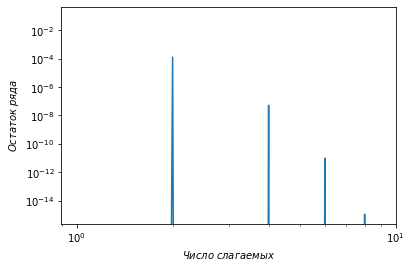

Логарифм через сумму: 0.09531017970238105
Логарифм через NumPy 0.09531017980432493
Относительная погрешность: 1.0696012125814867e-09


In [15]:
eps=epsilon #заданная точность
x=1.1 #для определенного числа
a=x-1
R=a/(1+a)
n=0
rr=[]
rr.append(R)
while np.abs(R)>eps:
    n+=1
    R=-R*a/(1+a)/(n+1)
    rr.append(R)

print('Необходимое количество слагаемых:',n)
plot_error([i for i in range(n+1)],rr)

#Логарифм x через сумму n слагаемых
y=log_t(x,n)

print('Логарифм через сумму:',y)
print('Логарифм через NumPy',np.log(x))
print('Относительная погрешность:',rel_error(y,np.log(x)))

## Аппроксимация многочленами

При вычислении логарифма через частичную суммы мы по сути приближали логарифм многочленами.
Многочлен Тейлора давал хорошее приближение функции и нескольких производных, но только в одной точке.
Мы же сейчас интересуемся только значением функции, но хотели бы иметь хорошую точность приближения на целом интервале.
Для достижения этой цели многочлены Тейлора подходят плохо, однако можно воспользоваться многочленами Лагранжа, Чебышева и т.п., или можно попытаться минимизировать непосредственно ошибку прилижения на отрезке, варьируя коэффициенты многочлена.

В качестве примера мы рассмотрим построение интерполяционного многочлена Лагранжа.
Этот многочлен будет точно совпадать с приближаемой функцией в $N+1$ узле, где $N$~-- степень многочлена, а между узлами мы надеямся, что погрешность не будет слишком силько расти. Зафиксируем несколько значений $x_n=1+1/(n+1)$, $n=0..N$, из интервала $[1,2]$ и вычислим в них точные значения логарифма в этих точках $y_n=\ln(x_n)$. Тогда интерполяционный многочлен имеет вид:
$$L(x)=\sum_{n=0}^{N}\prod_{k\neq n} \frac{x-x_k}{x_n-x}.$$

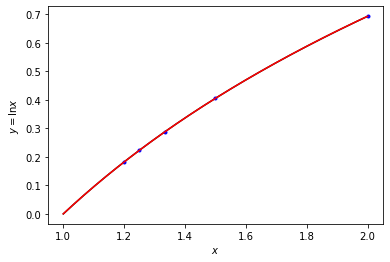

In [16]:
# Узлы интерполяции
N=5
xn=1+1./(1+np.arange(N))
yn=np.log(xn)
# Тестовые точки
x=np.linspace(1+1e-10,2,1000)
y=np.log(x)
# Многочлен лагранжа
import scipy.interpolate
L=scipy.interpolate.lagrange(xn,yn)
yl=L(x)
plt.plot(x,y,'-k')
plt.plot(xn,yn,'.b')
plt.plot(x,yl,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

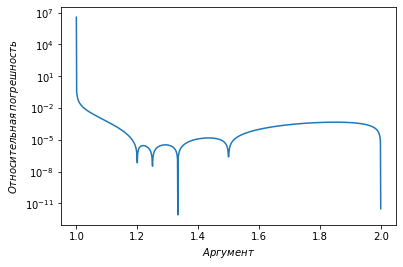

In [17]:
plt.semilogy(x,relative_error(y,yl))
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

Как мы видим, погрешность стремится к нулю в узлах интерполяции, между узлами ошибка не растет выше некоторой величины, т.е. с точки зрения вычисления функции этот приближение гораздо лучше.

**Задание 3.** Как следует из графика ошибки, предложенный выбор узлов $x_n$ плох. 
Подумайте, как лучше расположить узлы интерполяции? 
Воспользуйтесь формулой приведения 
$$x=\frac{1+2u/3}{1-2u/3},$$
позволяющей преобразовать интервал $x\in[1/5,5]$ в интервал $u\in[-1,1]$.
Будет ли разложение по степеням $u$ предпочтительнее разложения по степеням $a=x-1$?
Составьте интерполяционный многочлен Лагранжа от переменной $u$ с узлами в нулях многочлена Чебышева:
$$u_n=\cos\frac{\pi(n+1/2)}{N+1},\quad n=0..N.$$
Сравните точности аппроксимации с узлами в $x_n$ и в $u_n$.

# Решение3

Так как интерполяция полиномами Лагранжа дала не очень точный результат, то воспользуемся полиномами Чебышева. 

N= 5


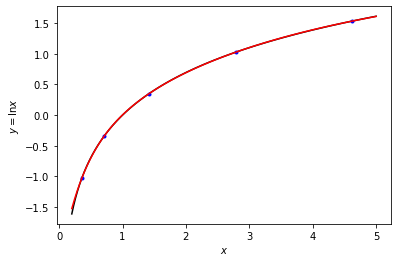

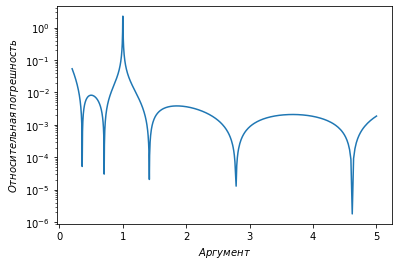

N= 10


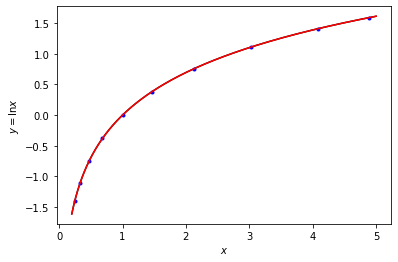

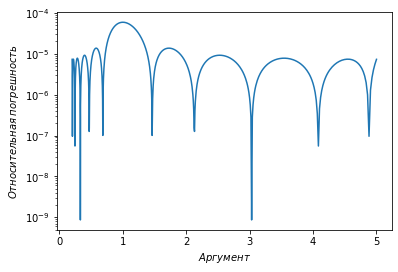

N= 15


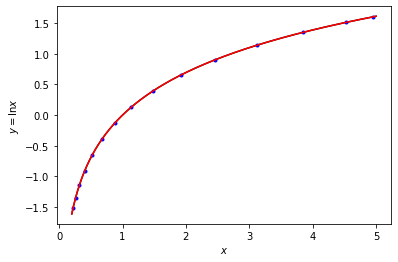

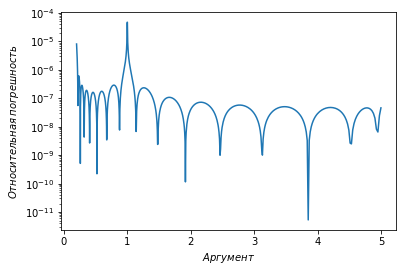

N= 20


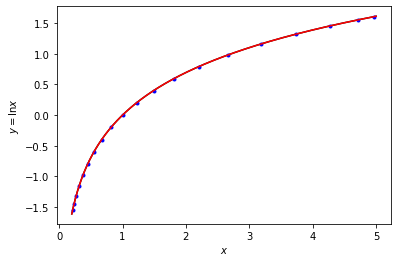

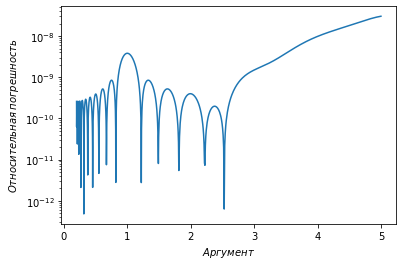

In [66]:
# Узлы интерполяции

def uf(x):
    return 1.5*(x-1)/(x+1)

for N in range(5,25,5):
    un=np.cos(np.pi*(np.arange(N)+0.5)/(N+1)) #узлы u_n Чебышева
    xn=(1+2*un/3)/(1-2*un/3)
    yn=np.log(xn)

    # Тестовые точки
    u=np.linspace(-1,1,1000)
    x=(1+2*u/3)/(1-2*u/3)
    y=np.log(x)

    # Многочлен лагранжа
    import scipy.interpolate
    L=scipy.interpolate.lagrange(un,yn) #для узлов Чебышева
    yl=L(uf(x))
    
    print('N=',N)
    plt.plot(x,y,'-k')
    plt.plot(xn,yn,'.b')
    plt.plot(x,yl,'-r')
    plt.xlabel("$x$")
    plt.ylabel("$y=\ln x$")
    plt.show()

    plt.semilogy(x,relative_error(y,yl))
    plt.xlabel("$Аргумент$")
    plt.ylabel("$Относительная\;погрешность$")
    plt.show()

Заметим, что интерполяция с помощью многочлена Чебышева дает результат лучше, чем многочлен Лагранжа.

**Задание A (повышенная сложность).** Найдите многочлен данной степени $N$, дающий наименьшую погрешность приближения логарифма на интервале $[1/5,5]$.

**Задание B (повышенная сложность).** Постройте разложение логарифма на интервале $[1/5,5]$ по многочленам Чебышева от переменной $u$ методом Ланцоша.

## Итерационный метод

Для нахождения $y$, такого что $y=\ln x$, можно численно решить уравнение $x=e^y$,
что может оказаться проще, чем считать логарифм напрямую.
Для решения уравнения воспользуемся методом Ньютона.
Перепишем уравнение в виде $F(y)=e^y-x=0$, т.е. будем искать нули функции $F$.
Пусть у нас есть начальное приближение для $y=y_0$.
Приблизим функцию $F$ рядом с $y_0$ с помощью касательной,
т.е. $F(y)\approx F'(y_0)(y-y_0)+F(y_0)$.
Если функция $F$ близка к линейной (что верно, если $y_0$ близко к нулю функции), то точки пересечения функции и касательной с осью абсцисс близки.
Составим уравнение на ноль касательной:
$$F'(y_0)(y-y_0)+F(y_0)=0,$$
следовательно следующим приближением  выберем
$$y=y_0-\frac{F(y_0)}{F'(y_0)}.$$
Итерации по методу Ньютона определены следующей рекуррентной формулой:
$$y_{n+1}=y_n-\frac{F(y_n)}{F'(y_n)}.$$
Подставляя явный вид функции $F$, получаем
$$y_{n+1}=y_n-\frac{e^{y_n}-x}{e^{y_n}}=y_n-1+xe^{-y_n}.$$
Точное значение логарифма есть предел последовательности $y_n$ при $n\to\infty$.
Приближенное значение логарифма можно получить сделав несколько итераций.
При выполнении ряда условий метод Ньютона имеет квадратичную скорость сходимости, т.е.
$$|y_n-y^*|<\alpha|y_{n-1}-y^*|^2,$$
где $y^*=\lim_{n\to\infty} y_n$ - точное значение логарифма, и $\alpha\in(0,1]$ - некоторая константа.
Неформально выражаясь, квадратичная сходимость означает удвоение числа значащих цифр на каждой итерации. 

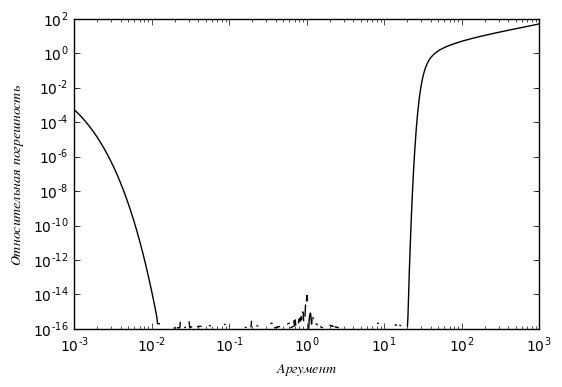

In [9]:
def log_newton(x, N=10):
    y=1 # начальное приближение
    for j in range(N):
        y=y-1+x/np.exp(y)
    return y

x=np.logspace(-3,3,1000)
y0=np.log(x)
y=log_newton(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

**Задание 4.** Начальное приближение в вышеприведенном алгоритме выбрано очень грубо, предложите лучшее приближение. Оцените число итераций, необходимое для получения лучшей возможной точности. Реализуйте метод Ньютона для найденного числа итераций. Удалось ли получить машиную точность? Почему? Почему при использовании 1 в качестве начального приближения итерации расходятся для $x$ заметно отличающихся от 1?

# Решение4

Метод Ньютона устроен так, что он сходится при любом начальном приближении, хотя будет делать это очень медленно. Однако оптимальный случай - когда количество итераций невелико. То есть будем искать наачльное приближение таким, чтобы уменьшить число итераций в методе Ньютона. Число в комрьютере представлено в следующем виде: $x=m*2^M$, где $m \in (-1,1)$. Тогда при выборе начального приближения в виде $2^M$ поиск значения сузится.

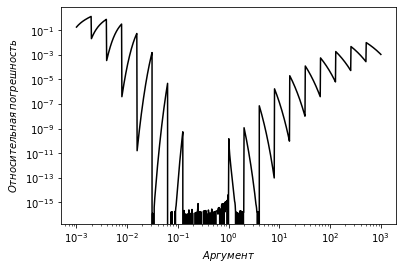

In [87]:
def log_newton(x, N=5):
    m,M=np.frexp(x) # M-начльное приближение 
    for j in range(N):
        M=M-1+x/np.exp(M)
    return M

x=np.logspace(-3,3,1000)
y0=np.log(x)
y=log_newton(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

Заметим, что при $N=5$ относительная погрешность велика. Можно попробовать следующий способов уменьшить ее: увеличить число итераций $N$. Посмотрим, что тогда получится.

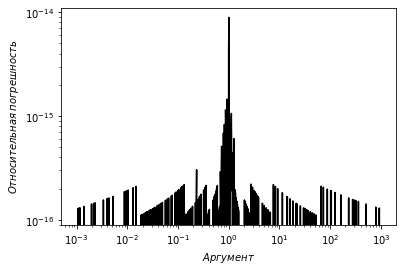

6.381229463392757e-17


In [143]:
def log_newton2(x, N=19):
    m,M=np.frexp(x) # M-начальное приближение 
    for j in range(N):
        M=M-1+x/np.exp(M)
    return M

x=np.logspace(-3,3,1000)
y0=np.log(x)
y=log_newton2(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

print(np.average(relative_error(y0,y)))

При $N=19$ относительная погрешность уменьшалась на несколько порядков, что значительно лучше изначальных результатов. При других $N$ среднее значение погрешности будет больше.

## Вычисление с помощью таблиц

Число с плавающей запятой представляется в виде $M\cdot 2^E$, где $M$ - мантисса, а $E$ - экспонента.
Согласно основному свойству логарифма
$$\ln (M\cdot 2^E)=E\ln 2+\ln M,$$
где константу $\ln 2$ можно предварительно вычислить и сохранить, экспонента представляет собой данное нам целое число, единственно что нам остается вычислить - это логарифм мантиссы.
Так как мантисса всегда лежит в интервале $(-1,1)$, а с учетом области определения логарима, в интервале $(0,1)$, то мы можем приближенно найти значение $\ln M$ как сохраненное в таблице значение логарифма в ближайшей к $M$ точке. 
Для составления таблицы удобно отбросить все биты мантиссы, кроме нескольких старших,
перебрать все их возможные значения и вычислить логарифм этих значений.

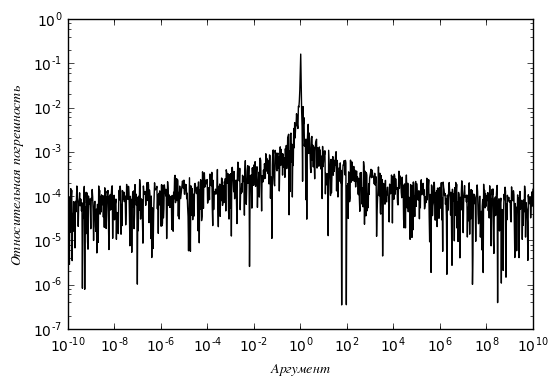

In [10]:
B=8 # число используемых для составления таблицы бит мантиссы
table=np.log((np.arange(0,2**B, dtype=np.double)+0.5)/(2**B))
log2=np.log(2)

def log_table(x):
    M,E=np.frexp(x)
    return log2*E+table[(M*2**B).astype(np.int)]

x=np.logspace(-10,10,1000)
y0=np.log(x)
y=log_table(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

**Задание 5.** Реализуйте метод, комбинирующий таблицы и интерполяцию многочленом (достаточно первой степени). Как зависит скорость метода от степени многочлена? Как зависит точность?

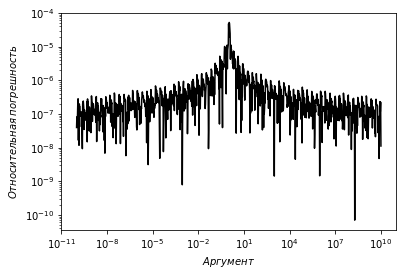

In [215]:
B=8 # число используемых для составления таблицы бит мантиссы
table=np.log((np.arange(0,2**B, dtype=np.double)+1)/(2**B))
log2=np.log(2)

def log_table_interpolation(x):
    M,E=np.frexp(x)
    argument=M*2**B #будем искать индекс в таблице (приведем к нормальному виду)
    index=argument.astype(int) #найдем ближайший - округлим вниз до целого
    d=argument-index #длина отрезка от приведенного вида до индекса
    return log2*E+table[index-1]+(table[index]-table[index-1])*d #табличная добавка из интерполяции

x=np.logspace(-10,10,1000)
y0=np.log(x)
y=log_table_interpolation(x)
plt.loglog(x,relative_error(y0,y),'-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

Относительная погрешность стала меньше.
Скорость уменьшается с увеличением полинома, однако точность будет увеличиваться (до определенного момента).

**Задание 6.** Используя любой метод, реализуйте вычисление логарифма с точностью, не более чем на порядок худшей, чем теоретически возможная.

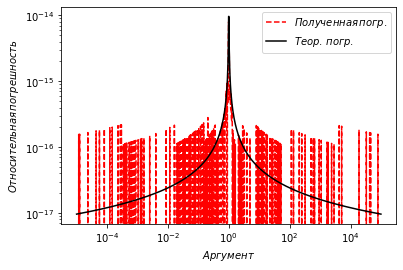

In [219]:
def log_newton_new(x):
    m,M=np.frexp(x) 
    M=M*np.log(2)
    for j in range(N):
        M=M-1+x/np.exp(M)
    return M

x0=np.logspace(-5,5,1000,dtype=np.double)
logg_new=log_newton_new(x0)

best_precision=(epsilon/2)*np.abs(1./np.log(x0))


plt.loglog(x0,rel_error(logg_new,np.log(x0)), '--r')
plt.loglog(x0,best_precision, '-k')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\,погрешность$")
plt.legend(["$Полученная\,погр.$","$Теор.\,погр.$"])
plt.show()

Можно использовать предыдущий метод (итерационный), но с более точным начальным приближением $M\log2$, где $M$ - мантиса числа. Тогда погрешность будет отличаться примерно на порядок от теоретического значения.